In [674]:
import requests
from requests.exceptions import Timeout, RequestException, HTTPError
import pandas as pd
from dateutil.relativedelta import relativedelta
import locale
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## 1\. Correlação entre consumo de energia elétrica e temperatura
### **1.1. Energia** 

In [675]:
conteudo_energia = None
URL_ENERGIA = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv'

try:
    resposta = requests.get(URL_ENERGIA)
    resposta.raise_for_status()

except HTTPError as err_http:
    print(f'Erro de HTTP: {err_http}')

except ConnectionError as err_conn:
    print(f'Erro de Conexão: {err_conn}')

except Timeout as err_timeout:
    print(f'Tempo de Resposta Excedido: {err_timeout}')

except RequestException as err_req:
    print(f'Erro na Requisição: {err_req}')

except Exception as exc:
    print(f'Ocorreu um erro inesperado: {exc}')

else:
    conteudo_energia = resposta.text
    if conteudo_energia is not None:
        caminho_arquivo = 'energia.csv'
        with open(caminho_arquivo, mode='w', encoding='utf-8') as arquivo_csv:
            arquivo_csv.write(conteudo_energia)
        print(f'Arquivo CSV salvo como: {caminho_arquivo}')
    else:
        print('O conteúdo do aquivo  está vazio ou não foi carregado.')


Arquivo CSV salvo como: energia.csv


In [676]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0])

In [677]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


Responda:
 - Qual é a granularidade da base de dados: **?**

In [678]:
energia['diferença'] = energia['referencia'].diff()
energia.head(13)

,referencia,residencial,industrial,comercial,diferença
0,2004-01-01,3694386,6977471,2450453,NaT
1,2004-02-01,3511541,7084623,2396965,31 days
2,2004-03-01,3629455,7087613,2402521,29 days
3,2004-04-01,3733863,7384540,2580914,31 days
4,2004-05-01,3537269,7258307,2344084,30 days
5,2004-06-01,3433443,7501655,2159479,31 days
6,2004-07-01,3457623,7580439,2233526,30 days
7,2004-08-01,3453322,7710196,2192652,31 days
8,2004-09-01,3596160,7747917,2359085,31 days
9,2004-10-01,3608130,7762817,2415036,30 days


> #### Análise dos Dados
> 
> ##### Coluna `referencia`
> - A granularidade dos dados na coluna `referencia` é **mensal**.
> - O intervalo mínimo encontrado está em `2004-XX-01`.
> 
> ##### Coluna `diferença`
> - A coluna `diferença` foi criada a partir da coluna `referencia`.
> - Os valores dessa coluna correspondem ao **total de dias em cada mês** reforçando que nosso intervalo é **mensal**.
---

Responda:
 - Qual é o intervalo de tempo (min/max): **?**

In [679]:
# Configurar o locale para português
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

data_inicial_energia = energia['referencia'].min()
data_final_energia = energia['referencia'].max()

diferenca = relativedelta(data_final_energia, data_inicial_energia)

quantidade_meses = diferenca.years * 12 + diferenca.months
quantidade_dias = diferenca.days

print('Coleta de dados:')
print(f'\tInicio: {data_inicial_energia.strftime('%d de %B de %Y')}')
print(f'\tFim: {data_final_energia.strftime('%d de %B de %Y')}')
print(f'\tTotal de {quantidade_meses} Meses {'' if quantidade_dias == 0  else f'e {quantidade_dias} Dias'}')


Coleta de dados:
	Inicio: 01 de janeiro de 2004
	Fim: 01 de dezembro de 2020
	Total de 203 Meses 


> #### Informações sobre a Coleta de Dados
> 
> - A coleta dos dados de Energia foi iniciada em **01 de Janeiro de 2004** e finalizada em **01 de Dezembro de 2020**.
> - O período total da coleta foi de **203 meses**.
---


### **1.2. Temperatura** 

In [680]:
conteudo_temperatura = None
URL_TEMPERATURA = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv'

try:
    resposta = requests.get(URL_TEMPERATURA)
    resposta.raise_for_status()

except HTTPError as err_http:
    print(f'Erro de HTTP: {err_http}')

except ConnectionError as err_conn:
    print(f'Erro de Conexão: {err_conn}')

except Timeout as err_timeout:
    print(f'Tempo de Resposta Excedido: {err_timeout}')

except RequestException as err_req:
    print(f'Erro na Requisição: {err_req}')

except Exception as exc:
    print(f'Ocorreu um erro inesperado: {exc}')

else:
    conteudo_temperatura = resposta.text
    if conteudo_temperatura is not None:
        caminho_arquivo = 'temperatura.csv'
        with open(caminho_arquivo, mode='w', encoding='utf-8') as arquivo_csv:
            arquivo_csv.write(conteudo_temperatura)
        print(f'Arquivo CSV salvo como: {caminho_arquivo}')
    else:
        print('O conteúdo do aquivo  está vazio ou não foi carregado.')

Arquivo CSV salvo como: temperatura.csv


In [681]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0])

In [682]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


Responda:
 - Qual é a granularidade da base de dados: **?**

In [683]:
temperatura['diferença'] = temperatura['referencia'].diff()
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg,diferença
0,2018-07-15,18,21.0,19.0,NaT
1,2018-07-16,19,23.0,19.0,1 days
2,2018-07-17,17,21.0,19.0,1 days
3,2018-07-18,18,23.0,19.0,1 days
4,2018-07-19,19,23.0,19.0,1 days


> #### Análise dos Dados
> 
> ##### Coluna `referencia`
> - A granularidade dos dados na coluna `referencia` é **diária**.
> - O intervalo mínimo encontrado está em `2004-07-XX`.
> 
> ##### Coluna `diferença`
> - A coluna `diferença` foi criada a partir da coluna `referencia`.
> - Os valores dessa coluna é a diferença entre as datas na coluna `referencia`  
a diferença é de **1 dias** reforçando que nosso intervalo é **diária**.
---

Responda:
 - Qual é o intervalo de tempo (min/max): **?**

In [684]:
data_inicial_temp = temperatura['referencia'].min()
data_final_temp = temperatura['referencia'].max()

diferenca = relativedelta(data_final_temp, data_inicial_temp)

quantidade_meses = diferenca.years * 12 + diferenca.months
quantidade_dias = diferenca.days

print('Coleta de dados:')
print(f'\tInicio: {data_inicial_temp.strftime('%d de %B de %Y')}')
print(f'\tFim: {data_final_temp.strftime('%d de %B de %Y')}')
print(f'\tTotal de {quantidade_meses} Meses {'' if quantidade_dias == 0  else f'e {quantidade_dias} Dias'}')



Coleta de dados:
	Inicio: 15 de julho de 2018
	Fim: 31 de dezembro de 2020
	Total de 29 Meses e 16 Dias


> #### Informações sobre a Coleta de Dados
> 
> - A coleta dos dados de Temperatura foi iniciada em **15 de Julho de 2018** e finalizada em **31 de Dezembro de 2020**.
> - O período total da coleta foi de **29 meses** e  **16 dias**.
---


## 2\. Processamento 
### **2.1. Energia** 

Processe o dataframe `energia`:
 - **a.** Atributa ao index a coluna temporal.

In [685]:
energia.set_index('referencia', inplace=True)


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [686]:
energia_2019_2020 = energia.loc['2019':'2020'].drop(columns='diferença')
energia_2019_2020.head(25)

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319
2019-06-01,5269701,7384031,3726296
2019-07-01,5152318,7434149,3547092
2019-08-01,5201820,7485988,3575392
2019-09-01,5376428,7411807,3768173


In [687]:
energia_2019_2020.shape

(24, 3)

### **2.2. Temperatura** 
Processe o dataframe `temperatura`:
 - **a.** Atributa ao index a coluna temporal.

In [688]:
temperatura.set_index('referencia', inplace=True)

 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [689]:
temp_2019_2020 = temperatura.loc['2019':'2020'].drop(columns='diferença')
temp_2019_2020.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-01-02,25,28.0,24.0
2019-01-03,26,31.0,24.0
2019-01-04,23,31.0,22.0
2019-01-05,21,28.0,23.0


 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [690]:
temp_2019_2020.dropna()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-01-02,25,28.0,24.0
2019-01-03,26,31.0,24.0
2019-01-04,23,31.0,22.0
2019-01-05,21,28.0,23.0
...,...,...,...
2020-12-27,20,24.0,23.0
2020-12-28,21,25.0,23.0
2020-12-29,22,27.0,23.0


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste). 

In [691]:
temp_2019_2020['temp-media'] = temp_2019_2020[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].mean(axis=1)
temp_2019_2020.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.666667
2019-01-02,25,28.0,24.0,25.666667
2019-01-03,26,31.0,24.0,27.000000
2019-01-04,23,31.0,22.0,25.333333
2019-01-05,21,28.0,23.0,24.000000


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação. 

In [692]:
temperatura_mensal = temp_2019_2020.resample('ME').mean()
temperatura_mensal.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-31,24.000000,29.774194,24.483871,26.086022
2019-02-28,21.928571,27.464286,23.571429,24.321429
2019-03-31,21.258065,26.645161,23.032258,23.645161
2019-04-30,20.833333,26.066667,22.600000,23.166667
2019-05-31,19.161290,24.193548,21.225806,21.526882


In [693]:
temperatura_mensal.shape

(24, 4)

## 3\. Correlação 
### **3.1. Consumo residencial** 
 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

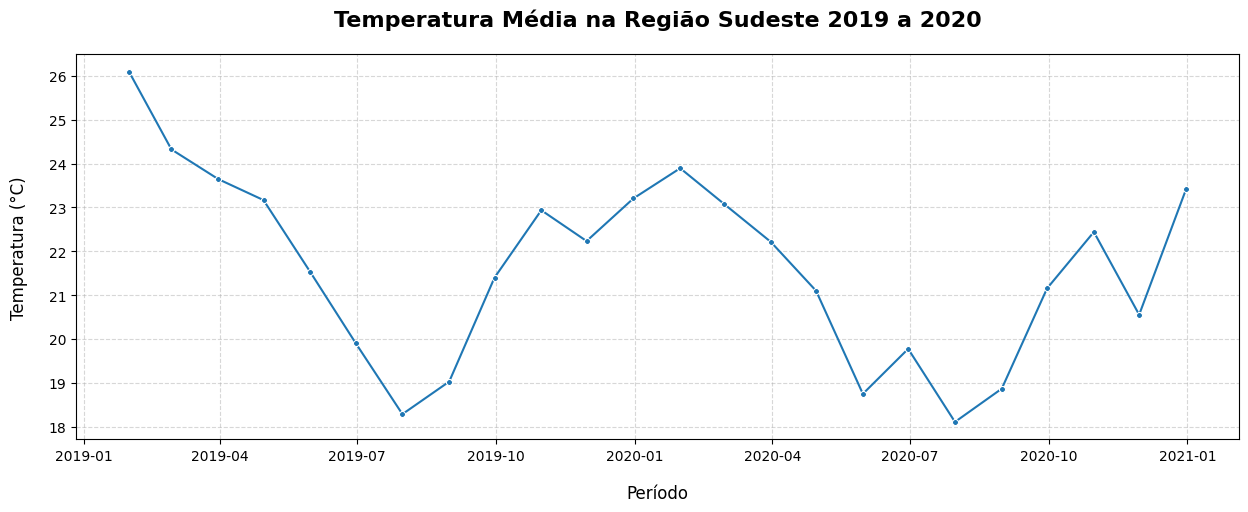

In [694]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=temperatura_mensal, x=temperatura_mensal.index, y='temp-media', 
             marker='8', markersize=5)
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.title('Temperatura Média na Região Sudeste 2019 a 2020', 
          fontdict={'size': 16, 'weight': 'bold'}, pad=20)
plt.ylabel('Temperatura (°C)', fontdict={'size': 12}, labelpad=15)
plt.xlabel('Período', fontdict={'size': 12}, labelpad=15)

plt.show()

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

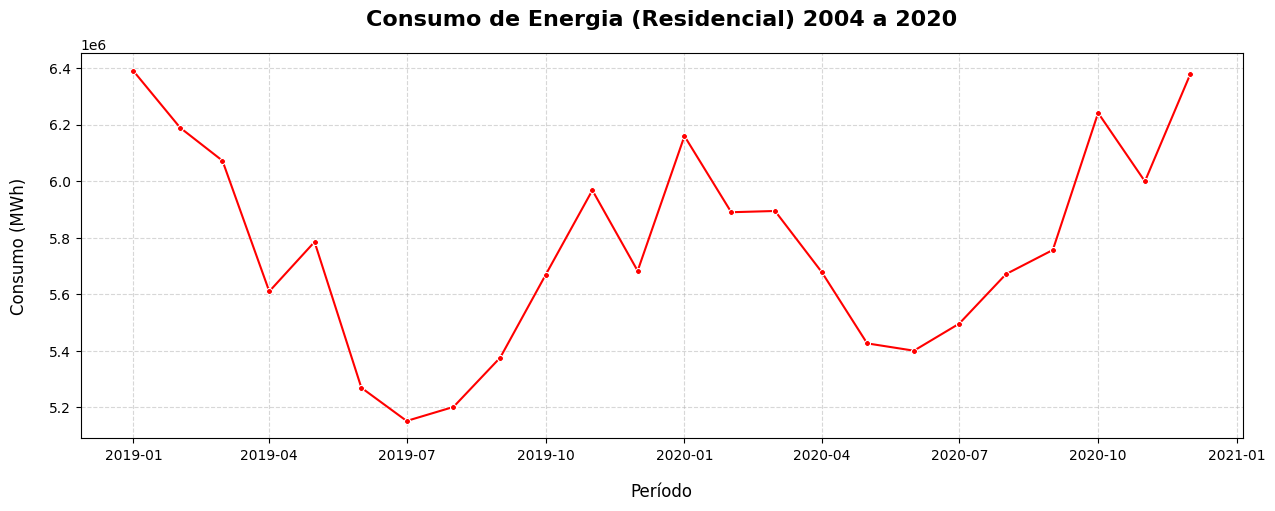

In [695]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=energia_2019_2020, x=energia_2019_2020.index, y='residencial', color='red', 
             marker='8', markersize=5)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.title('Consumo de Energia (Residencial) 2004 a 2020', 
          fontdict={'size': 16, 'weight': 'bold'}, pad=20)
plt.ylabel('Consumo (MWh)', fontdict={'size': 12}, labelpad=15)
plt.xlabel('Período', fontdict={'size': 12}, labelpad=15)

plt.show()

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [696]:
correlacao = np.corrcoef(energia_2019_2020.residencial, temperatura_mensal['temp-media'])
print(correlacao)

[[1.         0.78566572]
 [0.78566572 1.        ]]


 - **d.** Baseado nas respostas dos itens anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



> #### **Resposta:** 
> 
> A melhor forma de responder a essa pergunta é com um **gráfico**.
> 
> Utilizei o método `MinMaxScaler()` da biblioteca **sklearn** para normalizar os dois DataFrames.  
> A normalização foi aplicada para permitir a sobreposição dos dois gráficos, resultando na melhor visualização possível.
> 
> O valor de correlação **0.7856** indica uma **correlação positiva forte**, já que está próximo de 1.  
> Isso sugere uma relação significativa entre as variáveis, quando uma variável aumenta, a outra tende a aumentar, embora **não de forma perfeita**.  
> 
> No gráfico abaixo, é ainda mais fácil perceber a relação entre as variáveis.


In [697]:
normalizar =MinMaxScaler()
energia_normalizado = pd.DataFrame(normalizar.fit_transform(energia_2019_2020), columns=energia_2019_2020.columns)
temperatura_normalizado = pd.DataFrame(normalizar.fit_transform(temperatura_mensal), columns=temperatura_mensal.columns)

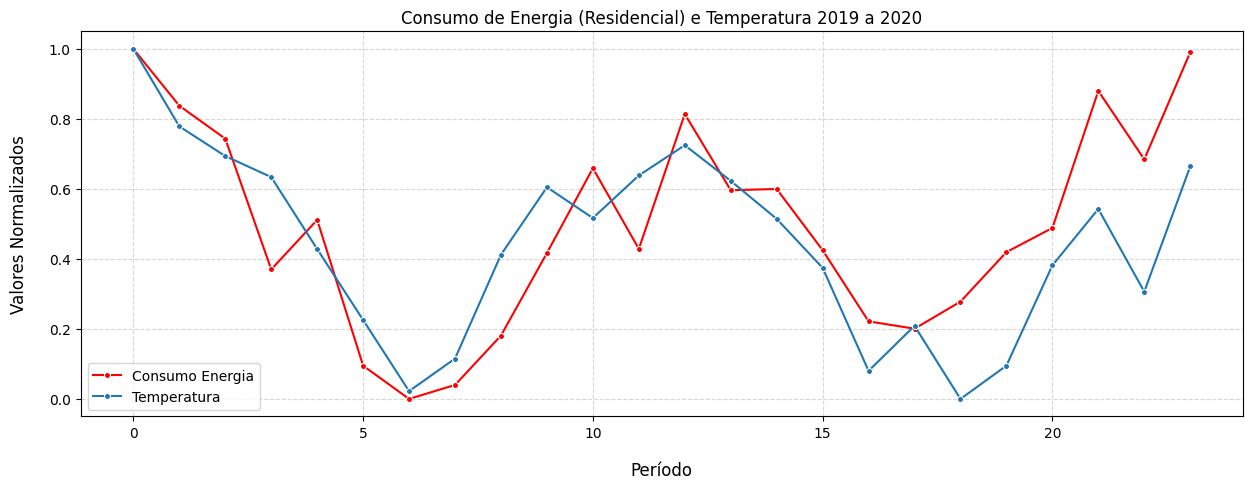

In [698]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=energia_normalizado, x=energia_normalizado.index, y='residencial', ax=ax, label='Consumo Energia', color="red", 
             marker='8', markersize=5)
sns.lineplot(data=temperatura_normalizado, x=temperatura_normalizado.index, y='temp-media', ax=ax, label="Temperatura", 
             marker='8', markersize=5)
ax.grid(axis='both', linestyle='--', alpha=0.5)
ax.set_title('Consumo de Energia (Residencial) e Temperatura 2019 a 2020')
ax.set_xlabel('Período', fontdict={'size': 12}, labelpad=15)
ax.set_ylabel('Valores Normalizados', fontdict={'size': 12}, labelpad=15)


plt.show()

### **3.2. Consumo comercial** 
 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **comercial**.

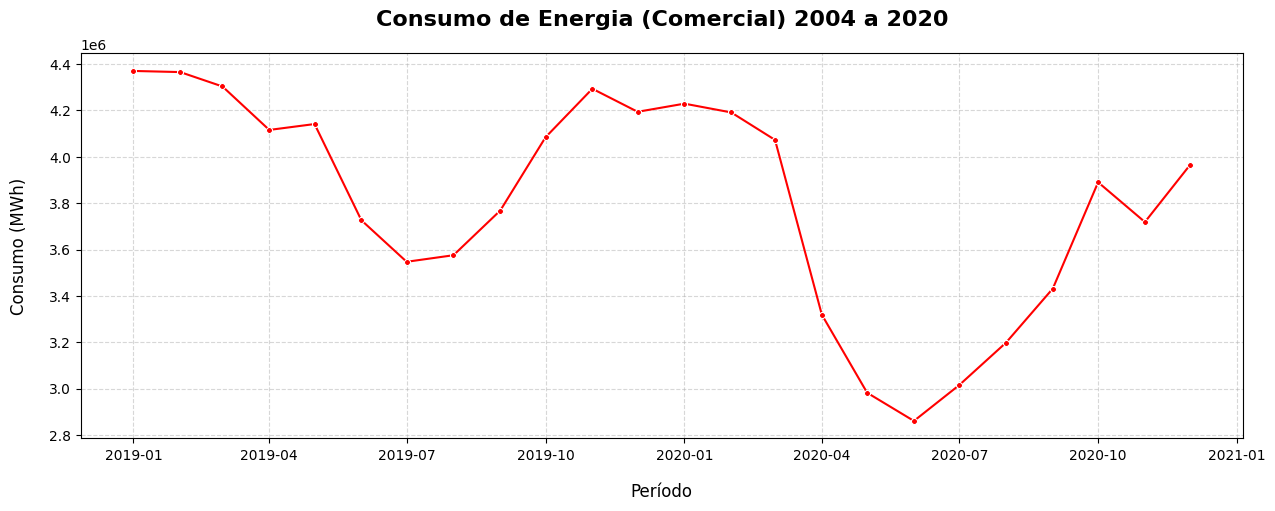

In [699]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=energia_2019_2020, x=energia_2019_2020.index, y='comercial', color='red', 
             marker='8', markersize=5)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.title('Consumo de Energia (Comercial) 2004 a 2020', 
          fontdict={'size': 16, 'weight': 'bold'}, pad=20)
plt.ylabel('Consumo (MWh)', fontdict={'size': 12}, labelpad=15)
plt.xlabel('Período', fontdict={'size': 12}, labelpad=15)

plt.show()

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **comercial** e a **temperatura** média agregada `temp-media`.

In [700]:
correlacao = np.corrcoef(energia_2019_2020.comercial, temperatura_mensal['temp-media'])
print(correlacao)

[[1.         0.84973511]
 [0.84973511 1.        ]]


 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **comercial**?

### **Resposta**

- O valor de correlação **0.8497** indica uma **correlação positiva forte**, pois está próximo de 1:  
  - Essa correlação é ainda mais forte do que entre temperatura e consumo residencial.  
  - Sugere uma relação significativa entre as variáveis: quando uma aumenta, a outra tende a aumentar.

#### Análise do Gráfico

- No gráfico abaixo, é fácil visualizar a relação entre as variáveis:  
  - Apesar de, em alguns períodos, as linhas estarem mais distantes uma da outra, a relação entre elas se mantém **proporcional**.

#### Fatores que Explicam a Correlação entre Temperatura e Consumo Comercial

1. **Ambientes Climatizados**:  
   - Empresas no setor de vendas tendem a manter seus ambientes climatizados para proporcionar conforto aos clientes.  

2. **Equipamentos de Refrigeração**:  
   - O uso de ar-condicionado, ventiladores, geladeiras e freezers aumenta com a alta da temperatura ambiente.  
   - Esse aumento no uso de equipamentos explica a correlação positiva entre temperatura e consumo comercial.


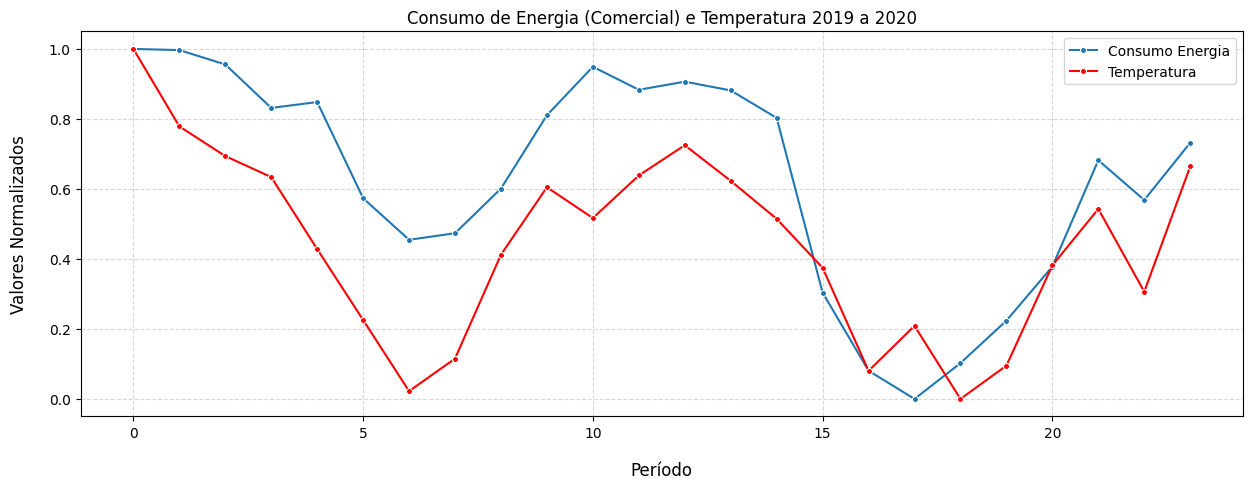

In [701]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=energia_normalizado, x=energia_normalizado.index, y='comercial', ax=ax, label='Consumo Energia', 
             marker='8', markersize=5)
sns.lineplot(data=temperatura_normalizado, x=temperatura_normalizado.index, y='temp-media', ax=ax, label="Temperatura", color="red", 
             marker='8', markersize=5)
ax.grid(axis='both', linestyle='--', alpha=0.5)
ax.set_title('Consumo de Energia (Comercial) e Temperatura 2019 a 2020')
ax.set_xlabel('Período', fontdict={'size': 12}, labelpad=15)
ax.set_ylabel('Valores Normalizados', fontdict={'size': 12}, labelpad=15) 

plt.show()

### **3.3. Consumo industrial** 
 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **industrial**.

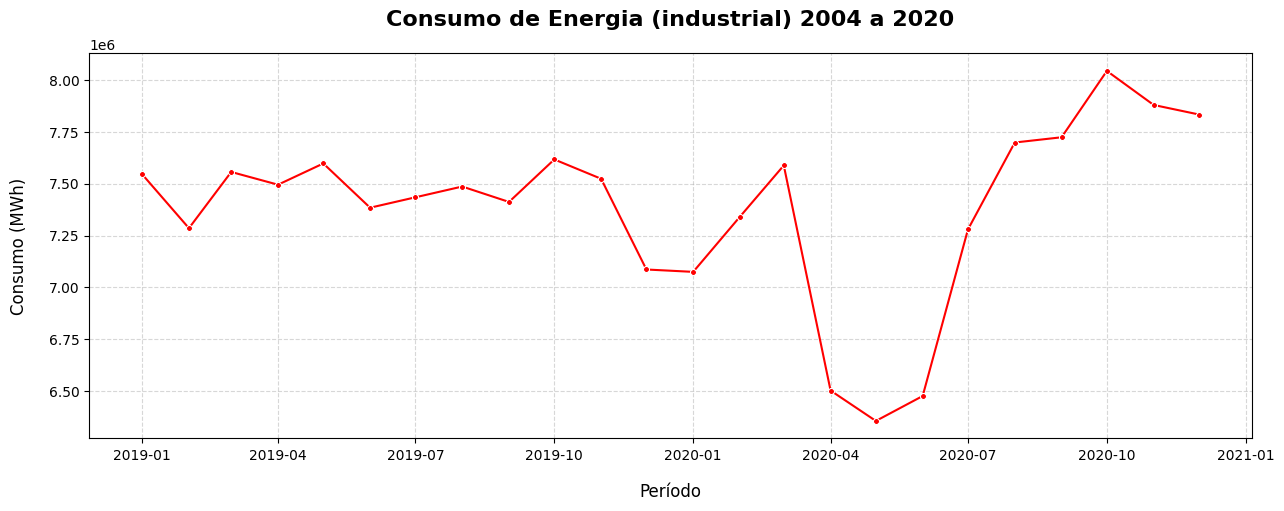

In [702]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=energia_2019_2020, x=energia_2019_2020.index, y='industrial', color='red', 
             marker='8', markersize=5)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.title('Consumo de Energia (industrial) 2004 a 2020', 
          fontdict={'size': 16, 'weight': 'bold'}, pad=20)
plt.ylabel('Consumo (MWh)', fontdict={'size': 12}, labelpad=15)
plt.xlabel('Período', fontdict={'size': 12}, labelpad=15)

plt.show()

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **industrial** e a **temperatura** média agregada `temp-media`.

In [703]:
correlacao = np.corrcoef(energia_2019_2020.industrial, temperatura_mensal['temp-media'])
print(correlacao)

[[1.         0.24102995]
 [0.24102995 1.        ]]


 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **industrial**?

### **Resposta**

- O valor de correlação **0.2410** indica uma **correlação positiva fraca**:  
  - Positiva porque é maior que 0.  
  - Fraca porque está próximo de 0.  
  Isso sugere uma relação muito fraca ou quase nula entre as variáveis.

#### Análise do Gráfico

- No gráfico abaixo, é mais fácil perceber a relação entre as variáveis:
  - Em alguns momentos, as linhas se cruzam, mas **não há correlação**.  
  - Em certos períodos, os valores são até **inversamente proporcionais**.

#### Fatores que Afetam a Correlação entre Indústria e Temperatura

1. **Área de atuação da indústria**:  
   - Por exemplo, indústrias alimentícias precisam manter a temperatura baixa para preservar os alimentos.  
   O consumo de energia é constante, independentemente da temperatura ambiente.

2. **Quantidade de máquinas e processos internos**:  
   - Muitas máquinas e processos podem manter um consumo constante, sem relação com a temperatura.

3. **Indústrias que operam 24 horas por dia**:  
   - Mesmo com mudanças na temperatura ambiente (dia quente e noite fria), o consumo permanece constante.

#### Impacto da Pandemia no Consumo de Energia

- No gráfico, é visível um consumo constante de energia pelas indústrias.  
- Nos meses **4, 5 e 6 de 2020**, há uma forte queda no consumo, provavelmente devido à **pandemia de COVID-19**:
  - O primeiro caso no Brasil ocorreu em **26 de fevereiro de 2020**.  
  Cerca de um mês depois, essa queda no consumo foi observada.

- Após três meses, as empresas se adaptaram, e o consumo voltou a crescer:
  - O consumo aumentou mais do que no período anterior de constância.  
  - Isso pode ser explicado pela **alta demanda acumulada** durante o período em que as indústrias ficaram paradas.


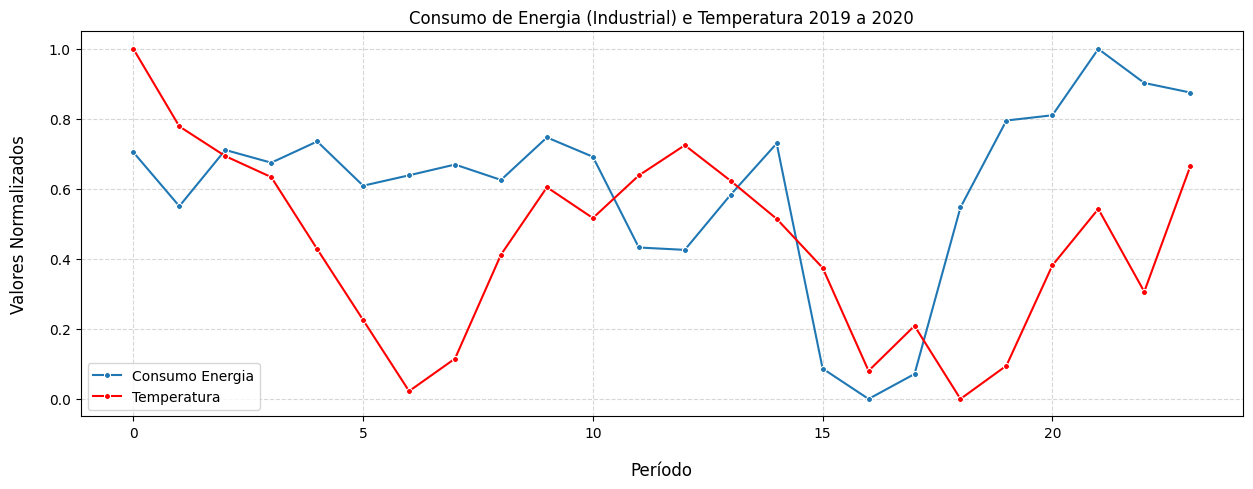

In [704]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=energia_normalizado, x=energia_normalizado.index, y='industrial', ax=ax, label='Consumo Energia', 
             marker='8', markersize=5)
sns.lineplot(data=temperatura_normalizado, x=temperatura_normalizado.index, y='temp-media', ax=ax, label="Temperatura", color="red", 
             marker='8', markersize=5)
ax.grid(axis='both', linestyle='--', alpha=0.5)
ax.set_title('Consumo de Energia (Industrial) e Temperatura 2019 a 2020')
ax.set_xlabel('Período', fontdict={'size': 12}, labelpad=15)
ax.set_ylabel('Valores Normalizados', fontdict={'size': 12}, labelpad=15) 

plt.show()